For this project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

### Importing the libraries 

In [95]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

### Read the dataset

In [96]:
df=pd.read_csv("911.csv")

In [97]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


### Check the info like data type and no elements and so 

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


### Get the how many are null values in different columns 

In [99]:
df.isnull().sum()

lat              0
lng              0
desc             0
zip          12855
title            0
timeStamp        0
twp             43
addr           519
e                0
dtype: int64

### Get the top tiltes 

In [100]:
df['title'].value_counts().head(5)

Traffic: VEHICLE ACCIDENT -    23066
Traffic: DISABLED VEHICLE -     7702
Fire: FIRE ALARM                5496
EMS: RESPIRATORY EMERGENCY      5112
EMS: CARDIAC EMERGENCY          5012
Name: title, dtype: int64

#### As we can see title contains reason : followed by description like EMS: FIRE ALARM so split it and create a new coulmn as reason 

#### Breakdown the tilte to get the reason column 

In [101]:
df['reason']=df['title'].apply(lambda x : x.split(':')[0])

In [102]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire


#### Get the no of no of unique twp in dataset

In [103]:
df['twp'].nunique()

68

#### Get the no of unique zips in dataset

In [104]:
df['zip'].nunique()

104

### Convert the timestamp column to date time and split in day month and year 

In [105]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [106]:
df['day of week']=df['timeStamp'].dt.dayofweek
df['month']=df['timeStamp'].dt.month
df['year']=df['timeStamp'].dt.year
df['Hour']=df['timeStamp'].dt.hour

In [107]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,day of week,month,year,Hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,3,12,2015,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,3,12,2015,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,3,12,2015,17


#### Map the day of week given as number to string format like 0 ---> Mon and so

In [108]:
# Map day of week to short week days format 
cmap={0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['day of week']=df['day of week'].map(cmap)

In [109]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,day of week,month,year,Hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,Thu,12,2015,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,Thu,12,2015,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,Thu,12,2015,17


### Data Analysis and visualization

### Analyze the no of  911 calls vs reasons 

<AxesSubplot:xlabel='reason', ylabel='count'>

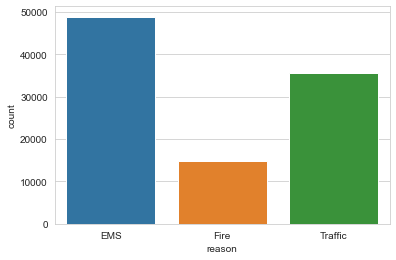

In [110]:
sns.countplot(data=df,x='reason')

#### It looks like most of calls are related to ems 

### Analysis of no of 911 calls vs day of week with partition based on reason

<AxesSubplot:xlabel='day of week', ylabel='count'>

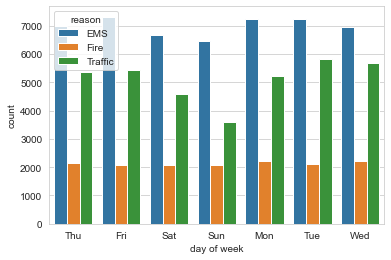

In [111]:
sns.countplot(data=df,x='day of week',hue='reason')

### Analysis of no of 911 calls vs month with partition based on reason

<AxesSubplot:xlabel='month', ylabel='count'>

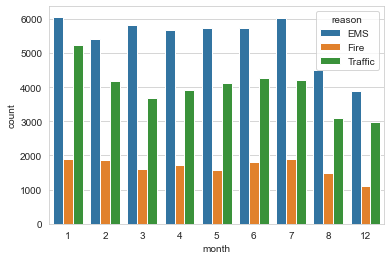

In [112]:
sns.countplot(data=df,x='month',hue='reason')

#### Based on the above month wise distribution it is there are few months are not present in the dataset 

**Did you notice something strange about the Plot?**

_____

** You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas... **

In [113]:
# Grouping based on month and then have different plots for analysis 
byMonth=df.groupby(['month']).count()

In [114]:
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,day of week,year,Hour
month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969


#### Creating line plot ,scatter plot,lmplot for filing the gaps of months so that we can get he trend 

<AxesSubplot:xlabel='month', ylabel='title'>

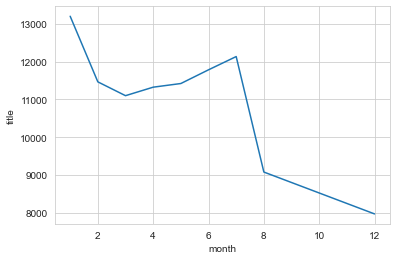

In [115]:
sns.lineplot(data=byMonth,x='month',y='title')

<AxesSubplot:xlabel='month', ylabel='title'>

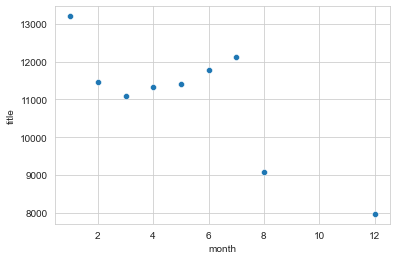

In [116]:
sns.scatterplot(data=byMonth,x='month',y='title')

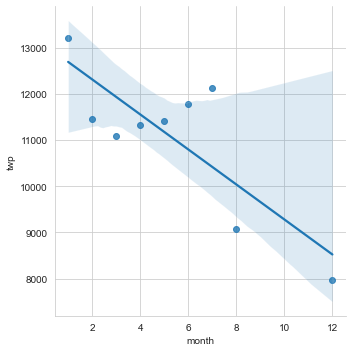

In [117]:
sns.lmplot(data=byMonth.reset_index(),x='month',y='twp')

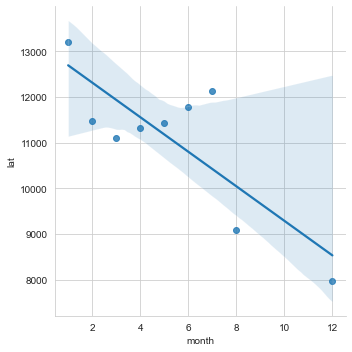

In [118]:
sns.lmplot(data=byMonth.reset_index(),x='month',y='lat')

#### Creating a seperate date column from the timestamp column so that we can get the trend datewise 

In [119]:
df['Date']=df['timeStamp'].apply(lambda t: t.date())

In [120]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,day of week,month,year,Hour,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,Thu,12,2015,17,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,Thu,12,2015,17,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,Thu,12,2015,17,2015-12-10


In [121]:
byDate=df.groupby(['Date']).count()

In [122]:
byDate

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,day of week,month,year,Hour
Date,,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447,447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-20,328,328,328,279,328,328,328,327,328,328,328,328,328,328
2016-08-21,357,357,357,299,357,357,357,352,357,357,357,357,357,357
2016-08-22,389,389,389,336,389,389,388,384,389,389,389,389,389,389


<AxesSubplot:xlabel='Date', ylabel='twp'>

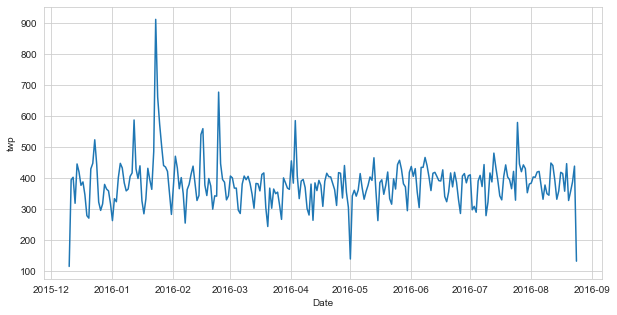

In [123]:
plt.figure(figsize=(10,5))
sns.lineplot(data=byDate.reset_index(),x='Date',y='twp')

In [124]:
df_ems=df[df['reason']=='EMS']
by_ems_df=df_ems.groupby('Date').count().reset_index()

In [125]:
by_ems_df.head(3)

,Date,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,day of week,month,year,Hour
0,2015-12-10,57,57,57,52,57,57,57,57,57,57,57,57,57,57
1,2015-12-11,186,186,186,166,186,186,186,186,186,186,186,186,186,186
2,2015-12-12,189,189,189,171,189,189,189,189,189,189,189,189,189,189


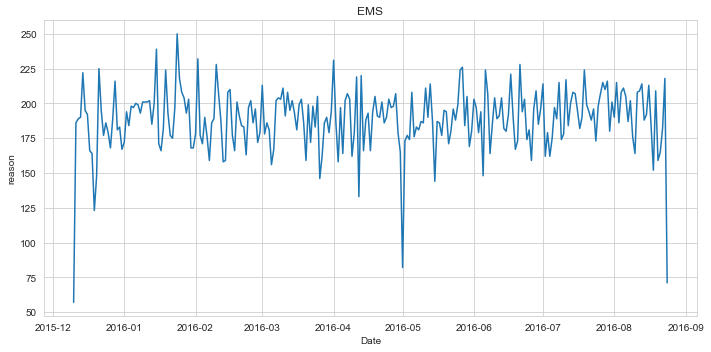

In [126]:
plt.figure(figsize=(10,5))
sns.lineplot(data=by_ems_df,x='Date',y='reason')
plt.title('EMS')
plt.tight_layout()

In [127]:
df_fire=df[df['reason']=='Fire']
by_fire_df=df_ems.groupby('Date').count().reset_index()
by_fire_df.head(3)

,Date,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,day of week,month,year,Hour
0,2015-12-10,57,57,57,52,57,57,57,57,57,57,57,57,57,57
1,2015-12-11,186,186,186,166,186,186,186,186,186,186,186,186,186,186
2,2015-12-12,189,189,189,171,189,189,189,189,189,189,189,189,189,189


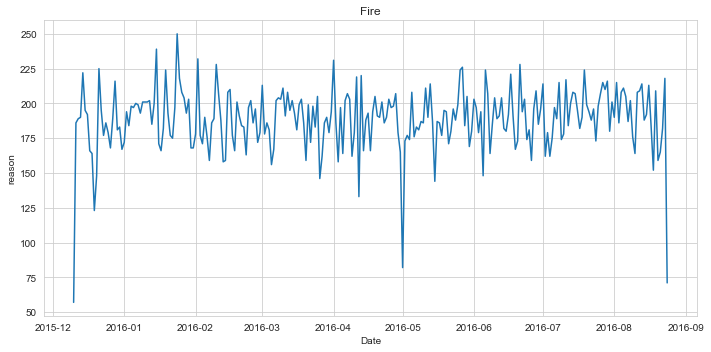

In [128]:
plt.figure(figsize=(10,5))
sns.lineplot(data=by_ems_df,x='Date',y='reason')
plt.title('Fire')
plt.tight_layout()

In [129]:
df_traffic=df[df['reason']=='Traffic']
by_traffic_df=df_ems.groupby('Date').count().reset_index()
by_traffic_df.head(3)

,Date,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,day of week,month,year,Hour
0,2015-12-10,57,57,57,52,57,57,57,57,57,57,57,57,57,57
1,2015-12-11,186,186,186,166,186,186,186,186,186,186,186,186,186,186
2,2015-12-12,189,189,189,171,189,189,189,189,189,189,189,189,189,189


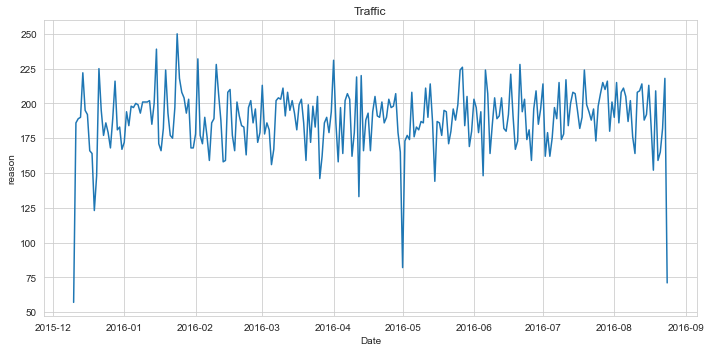

In [130]:
plt.figure(figsize=(10,5))
sns.lineplot(data=by_ems_df,x='Date',y='reason')
plt.title('Traffic')
plt.tight_layout()

In [131]:
month_dow_df=df.groupby(by=['month','day of week']).count()['reason']
month_dow_df

month  day of week
1      Fri            1970
       Mon            1727
       Sat            2291
       Sun            1960
       Thu            1584
                      ... 
12     Sat             978
       Sun             907
       Thu            1266
       Tue            1234
       Wed            1262
Name: reason, Length: 63, dtype: int64

In [132]:
month_dow_df=df.groupby(by=['month','day of week']).count()['reason'].unstack()

<AxesSubplot:xlabel='day of week', ylabel='month'>

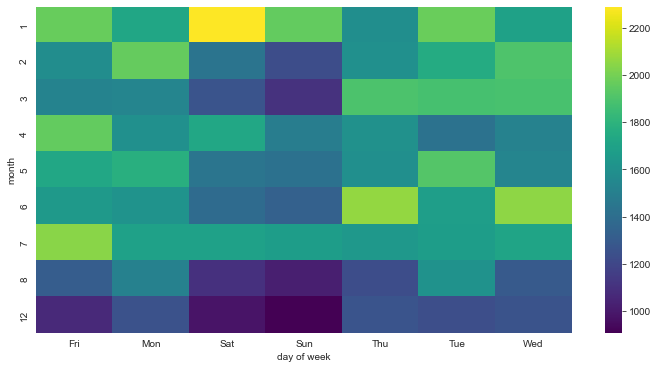

In [133]:
plt.figure(figsize=(12,6))
sns.heatmap(data=month_dow_df,cmap='viridis')

In [134]:
dow_hour_df=df.groupby(['day of week','Hour']).count()['reason']

In [135]:
dow_hour_df

day of week  Hour
Fri          0       275
             1       235
             2       191
             3       175
             4       201
                    ... 
Wed          19      686
             20      668
             21      575
             22      490
             23      335
Name: reason, Length: 168, dtype: int64

In [136]:
dow_hour_df=dow_hour_df.unstack()

In [137]:
dow_hour_df

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day of week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


<AxesSubplot:xlabel='Hour', ylabel='day of week'>

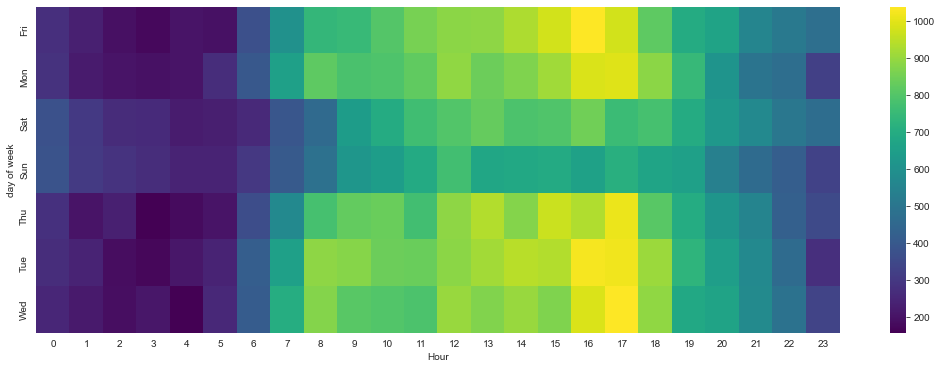

In [138]:
plt.figure(figsize=(18,6))
sns.heatmap(data=dow_hour_df,cmap='viridis')

### To do anaylsis of ems / traffic /fire calls for a month vs dow distribution and so on for year vs month distribution when are most of calls coming  

In [58]:
df_ems_month=df[df['reason']=='EMS'].groupby(['day of week','month']).count()['reason'].unstack()

In [59]:
df_ems_month

month,1,2,3,4,5,6,7,8,12
day of week,,,,,,,,,
Fri,982,765,780,1002,810,778,1040,629,529
Mon,799,934,789,813,912,797,767,766,663
Sat,931,721,696,892,725,755,907,578,480
Sun,969,674,683,693,792,665,913,540,527
Thu,769,746,973,770,817,973,801,568,576
Tue,831,794,972,699,917,826,790,822,571
Wed,782,779,939,811,761,926,811,605,552


<AxesSubplot:xlabel='month', ylabel='day of week'>

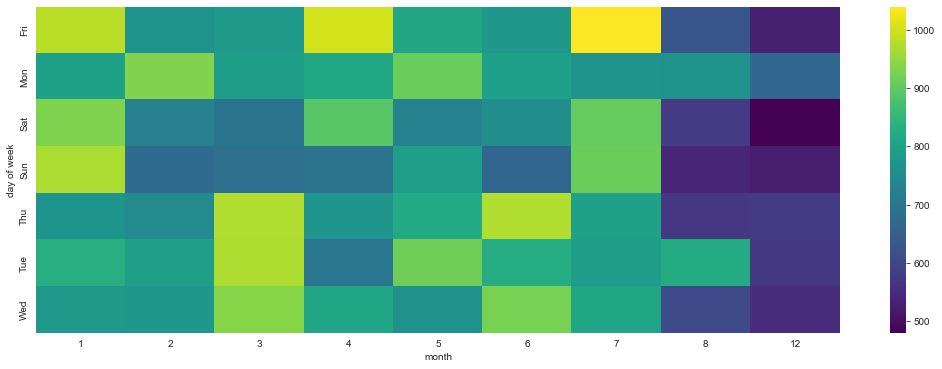

In [71]:
plt.figure(figsize=(18,6))
sns.heatmap(data=df_ems_month,cmap='viridis')

<AxesSubplot:xlabel='day of week', ylabel='month'>

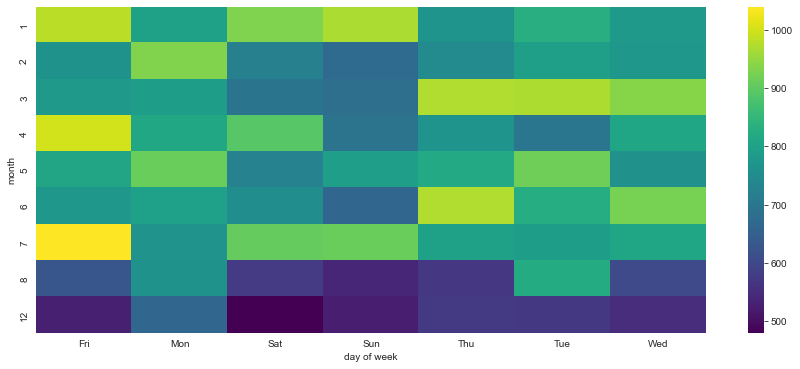

In [84]:
df_ems_mdow=df[df['reason']=='EMS'].groupby(['month','day of week']).count()['reason'].unstack()
df_ems_mdow.fillna(value=0,axis=0,inplace=True)
plt.figure(figsize=(15,6))
sns.heatmap(df_ems_mdow,cmap='viridis')

<AxesSubplot:xlabel='day of week', ylabel='month'>

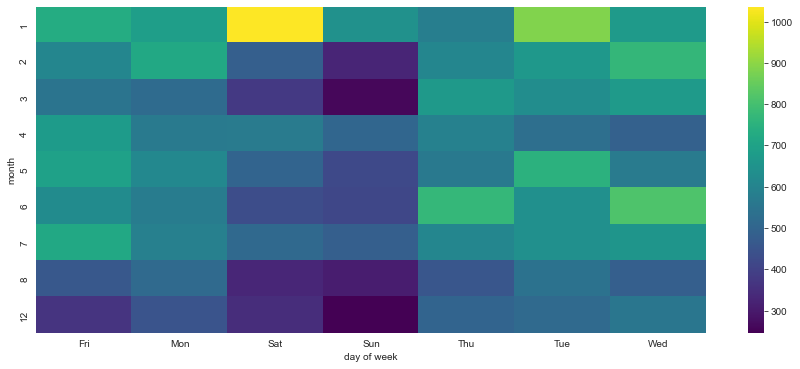

In [85]:
df_traffic_mdow=df[df['reason']=='Traffic'].groupby(['month','day of week']).count()['reason'].unstack()
df_traffic_mdow.fillna(value=0,axis=0,inplace=True)
plt.figure(figsize=(15,6))
sns.heatmap(df_traffic_mdow,cmap='viridis')

<AxesSubplot:xlabel='day of week', ylabel='month'>

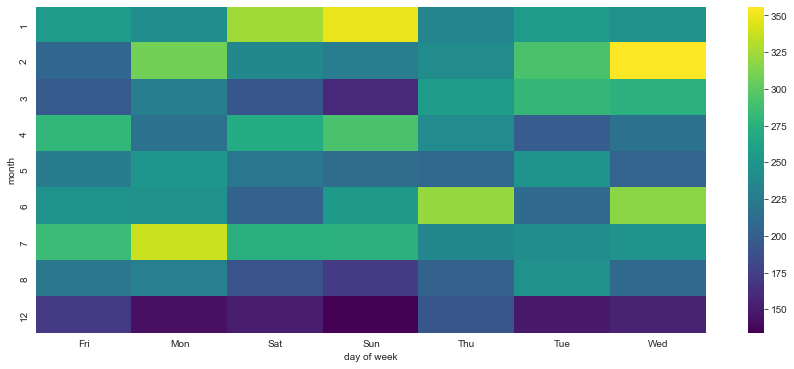

In [86]:
df_fire_mdow=df[df['reason']=='Fire'].groupby(['month','day of week']).count()['reason'].unstack()
df_fire_mdow.fillna(value=0,axis=0,inplace=True)
plt.figure(figsize=(15,6))
sns.heatmap(df_fire_mdow,cmap='viridis')

<AxesSubplot:xlabel='Hour', ylabel='day of week'>

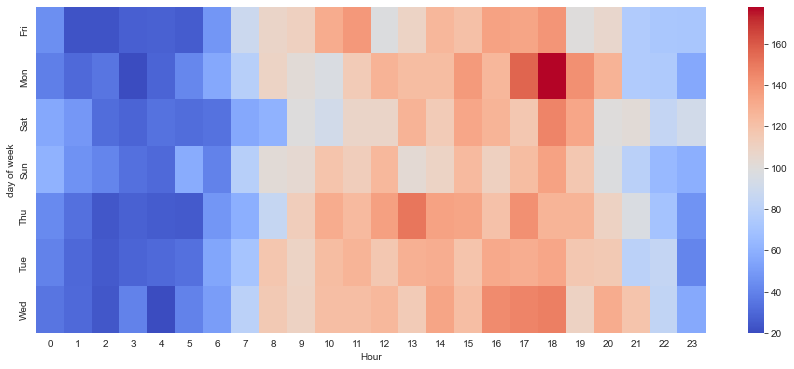

In [93]:
df_fire_hdow=df[df['reason']=='Fire'].groupby(['day of week','Hour']).count()['reason'].unstack()
df_fire_hdow.fillna(value=0,axis=0,inplace=True)
plt.figure(figsize=(15,6))
sns.heatmap(df_fire_hdow,cmap='coolwarm')

<AxesSubplot:xlabel='Hour', ylabel='day of week'>

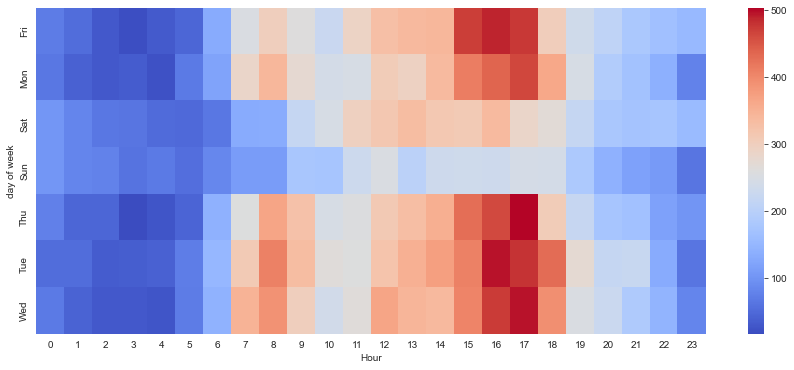

In [91]:
df_traffic_hdow=df[df['reason']=='Traffic'].groupby(['day of week','Hour']).count()['reason'].unstack()
df_traffic_hdow.fillna(value=0,axis=0,inplace=True)
plt.figure(figsize=(15,6))
sns.heatmap(df_traffic_hdow,cmap='coolwarm')

<AxesSubplot:xlabel='Hour', ylabel='day of week'>

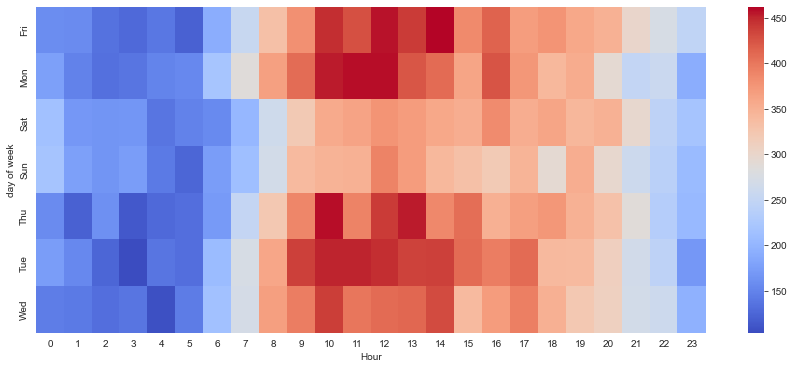

In [94]:
df_ems_hdow=df[df['reason']=='EMS'].groupby(['day of week','Hour']).count()['reason'].unstack()
df_ems_hdow.fillna(value=0,axis=0,inplace=True)
plt.figure(figsize=(15,6))
sns.heatmap(df_ems_hdow,cmap='coolwarm')

### As per the analysis we can conclude that 911 calls related to traffic more around 8am to 6pm and on sunday it is less through out the day and it makes sense alos during office hours usually traffic is more